In [1]:
import sqlite3
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [15]:
conn = sqlite3.connect("im.db")
df1 = pd.read_sql("""
Select *
from movie_basics
join movie_ratings
    using(movie_id)
""",conn)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [16]:
df1.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [17]:
df1['genres'] = df1.genres.fillna(value = 'Absent')
df1.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
dtype: int64

In [18]:
df1 = df1.dropna()
df1.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [19]:
#need to change the df back to an sql
# q = ("""
# Select genres, count(genres) as total
# from movie_basics
# where genres like '%Absent%'
# group by genres
# """)
# new_df = pysqldf(q)
# new_df.head()

We remove the outliers that are more than 2 standard distributions from the mean.
formula for below from: https://www.youtube.com/watch?v=zEvXT4H2vus

In [20]:
high_outlier = df1.runtime_minutes.quantile(.9545)
low_outlier = df1.runtime_minutes.quantile(.0455)
df1 = df1[~((df1.runtime_minutes < low_outlier)| 
            (df1.runtime_minutes > high_outlier))]
print("The new max is:", max(df1.runtime_minutes))
print("The new min is:", min(df1.runtime_minutes))

The new max is: 137.0
The new min is: 56.0


The mean is: 1 hour and 33 minutes 
The median is: 1 hour and 31 minutes 


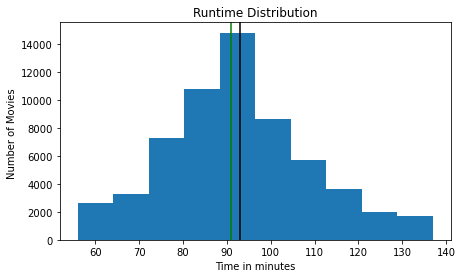

In [24]:
#df1.hist(column = 'runtime_minutes', figsize = (10,4), grid = False)
data = df1.runtime_minutes
mean = round(data.mean())
median = round(data.median())

fig, ax = plt.subplots(figsize=(7,4))
ax.hist(data)
ax.axvline(mean, color='black')
ax.axvline(median, color='green')
ax.set_title('Runtime Distribution')
ax.set_xlabel('Time in minutes')
ax.set_ylabel('Number of Movies ')

print('The mean is: {} hour and {} minutes '.format(math.floor(mean/60), int(mean%60)))
print('The median is: {} hour and {} minutes '.format(math.floor(median/60), int(median%60)))

array([[ 1.        , -0.02280973],
       [-0.02280973,  1.        ]])

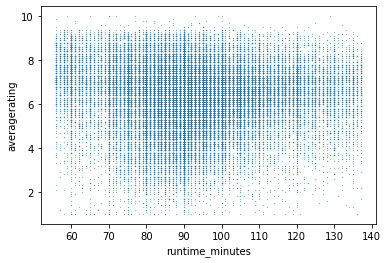

In [9]:
df1.plot.scatter(x = 'runtime_minutes',
                 y = 'averagerating',
                 s = .04)
np.corrcoef(df1['runtime_minutes'], df1['averagerating'])

In [10]:
df1.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451


In [26]:
#Can I do this in a for loop?
df_drama = pd.read_sql("""
Select genres, averagerating
from movie_basics
join movie_ratings
    using(movie_id)
Where genres like '%Drama%'
""",conn)
df_horror = pd.read_sql("""
Select genres, averagerating
from movie_basics
join movie_ratings
    using(movie_id)
Where genres like '%Horror%'
""",conn)
df_comedy = pd.read_sql("""
Select genres, averagerating
from movie_basics
join movie_ratings
    using(movie_id)
Where genres like '%Comedy%'
""",conn)
df_action = pd.read_sql("""
Select genres, averagerating
from movie_basics
join movie_ratings
    using(movie_id)
Where genres like '%Action%'
""",conn)
df_romance = pd.read_sql("""
Select genres, averagerating
from movie_basics
join movie_ratings
    using(movie_id)
Where genres like '%Romance%'
""",conn)

In [27]:
df_action.genres = 'Action'
df_comedy.genres = 'Comedy'
df_drama.genres = 'Drama'
df_horror.genres = 'Horror'
df_romance.genres = 'Romance'

Action = df_action
Comedy = df_comedy
Drama = df_drama
Horror = df_horror
Romance = df_romance

Action_rating = Action.averagerating
Comedy_rating = Comedy.averagerating
Drama_rating = Drama.averagerating
Horror_rating = Horror.averagerating
Romance_rating = Romance.averagerating

In [11]:
lower_txt_genres=['drama', 'horror', 'comedy', 'action', 'romance']
upper_txt_genres=['Drama', 'Horror', 'Comedy', 'Action', 'Romance']
all_genres = [Drama, Horror, Comedy, Action, Romance]
genre_rating = [Drama_rating, Horror_rating, Comedy_rating, Action_rating, Romance_rating]
colors = ['cyan', 'yellow', 'gray', 'magenta', 'green']

In [13]:
data = pd.DataFrame({'Drama': Drama_rating,
                     'Horror':Horror_rating,
                     'Comedy':Comedy_rating,
                     'Action':Action_rating,
                     'Romance':Romance_rating})
data.head()

,Drama,Horror,Comedy,Action,Romance
0,7.0,4.1,6.1,7.0,6.1
1,7.2,3.9,6.5,1.9,6.1
2,6.9,5.6,8.1,7.4,6.4
3,6.1,5.9,1.9,7.1,5.5
4,6.5,5.2,5.9,6.4,6.5


<AxesSubplot:ylabel='Density'>

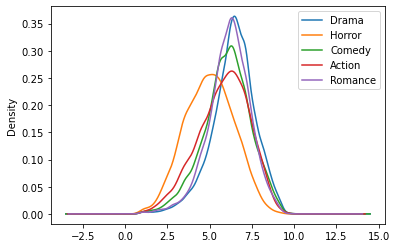

In [15]:
data.plot.kde()

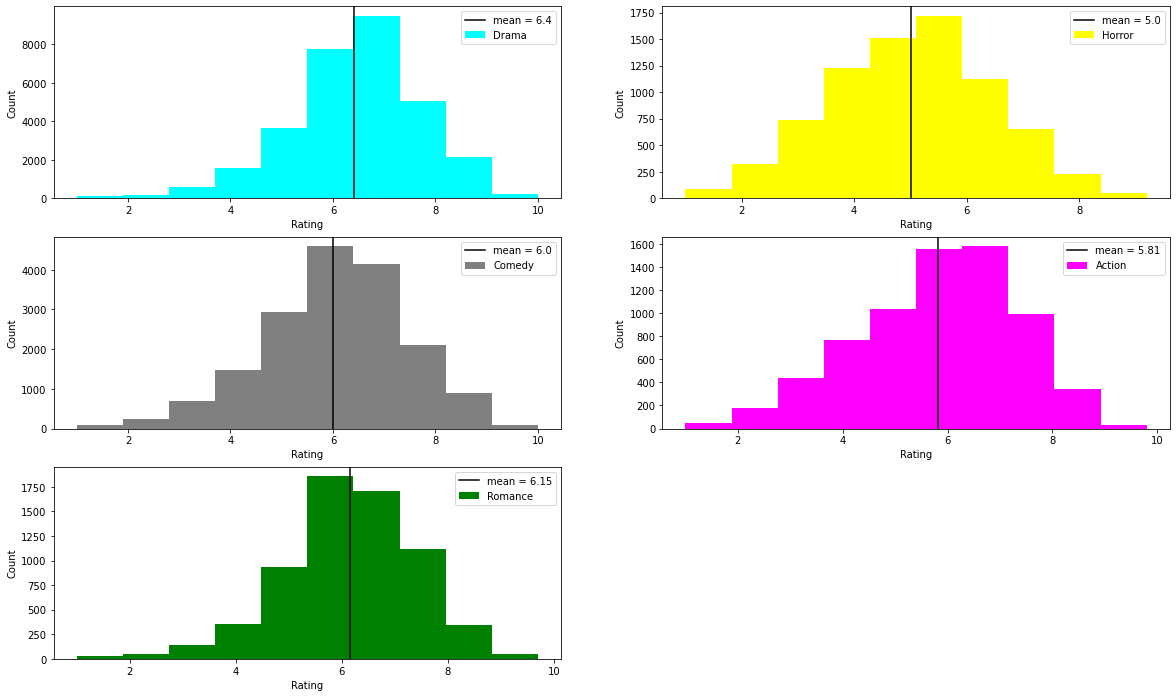

In [41]:
fig = plt.figure(figsize=(20,12))
i=0
for g,c,u in zip(genre_rating, colors, upper_txt_genres):
    i = i+1
    mean = g.mean()
    plt.subplot(3,2,i)
    plt.hist(g, color=c,histtype='bar', label = u)
    plt.axvline(mean, color='black', label = 'mean = {}'.format(round(mean,2)))
    plt.xlabel('Rating')
    plt.ylabel('Count')
    #plt.title(u)
    plt.legend()

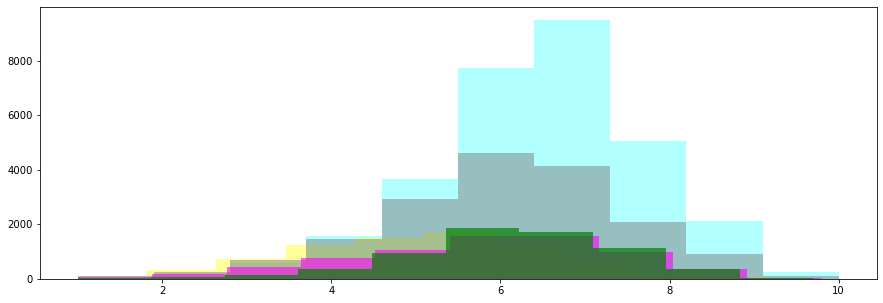

In [23]:
#make this into a step. histtype = 'step'?
#once its a step, decide btwn this and kdu or just the five seperate hist
fig, ax = plt.subplots(figsize = (15,5))
i=.2
for g,u,c in zip(genre_rating, upper_txt_genres, colors ):
    i=i+.1
    ax.hist(
        x=g,
        label=u,
        color=c,
        alpha=i 
)

In [18]:
#may not need this as its already in the plots above
for l,a in zip(lower_txt_genres, all_genres):
    print('The average rating for {} films is:'.format(l), round(a.averagerating.mean(), 2))

The average rating for drama films is: 6.4
The average rating for horror films is: 5.0
The average rating for comedy films is: 6.0
The average rating for action films is: 5.81
The average rating for romance films is: 6.15
